# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте приложить ссылку на данные). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


## Загрузка данных, очистка и работа с NaN значениями

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

file_list = os.listdir("Happiness Report")
print(file_list)

['2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv']


Стоит подчеркнуть, что я буду оставлять избыточное количество данных здесь для представления хода моих мыслей.<br>
Для начала посмотрим как выглядят вообще наши таблицы

In [2]:
df_temp = pd.read_csv('Happiness Report/2015.csv')
df_temp.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [3]:
df_temp = pd.read_csv('Happiness Report/2016.csv')
df_temp.head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

In [4]:
df_temp = pd.read_csv('Happiness Report/2017.csv')
df_temp.head()

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

In [5]:
df_temp = pd.read_csv('Happiness Report/2018.csv')
df_temp.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3                      0.138  
4                      0.357

In [6]:
df_temp = pd.read_csv('Happiness Report/2019.csv')
df_temp.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

Возьмем данные, которые присутствуют во всех. А именно:<br>
Rank, Country, Score, GDP, Life expectancy, Freedom, Generosity, Corruption
Поскольку присутствует 3 вида форматирования данных таблиц - сделаем выгрузку и конкатенацию, основанную на этих структурах

In [7]:
df = pd.DataFrame()

columns = {
    'target':['country','happiness_rank','happiness_score','gdp_per_capita','life_expectancy','freedom','generosity','government_corruption', 'year'],
    '2015':['Country','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Generosity','Trust (Government Corruption)'],
    '2016':['Country','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Generosity','Trust (Government Corruption)'],
    '2017':['Country','Happiness.Rank','Happiness.Score','Economy..GDP.per.Capita.','Health..Life.Expectancy.','Freedom','Generosity', 'Trust..Government.Corruption.'],
    '2018':['Country or region','Overall rank','Score','GDP per capita','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'],
    '2019':['Country or region','Overall rank','Score','GDP per capita','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
}

for file in file_list:
    year = file.split('.')[0]
    df_temp = pd.read_csv('Happiness Report/{}'.format(file),usecols=columns[year])
    # Sort columns in the right order
    df_temp = df_temp[columns[year]]
    df_temp['year'] = int(year)
    df_temp.columns = columns['target']
    df = pd.concat([df_temp, df])

df.reset_index(inplace = True, drop = True)
df.head()

country  happiness_rank  happiness_score  gdp_per_capita  \
0      Finland               1            7.769           1.340   
1      Denmark               2            7.600           1.383   
2       Norway               3            7.554           1.488   
3      Iceland               4            7.494           1.380   
4  Netherlands               5            7.488           1.396   

   life_expectancy  freedom  generosity  government_corruption  year  
0            0.986    0.596       0.153                  0.393  2019  
1            0.996    0.592       0.252                  0.410  2019  
2            1.028    0.603       0.271                  0.341  2019  
3            1.026    0.591       0.354                  0.118  2019  
4            0.999    0.557       0.322                  0.298  2019

Проверим полученные данные

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                782 non-null    object 
 1   happiness_rank         782 non-null    int64  
 2   happiness_score        782 non-null    float64
 3   gdp_per_capita         782 non-null    float64
 4   life_expectancy        782 non-null    float64
 5   freedom                782 non-null    float64
 6   generosity             782 non-null    float64
 7   government_corruption  781 non-null    float64
 8   year                   782 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 55.1+ KB


In [9]:
df.describe()

happiness_rank  happiness_score  gdp_per_capita  life_expectancy  \
count      782.000000       782.000000      782.000000       782.000000   
mean        78.698210         5.379018        0.916047         0.612416   
std         45.182384         1.127456        0.407340         0.248309   
min          1.000000         2.693000        0.000000         0.000000   
25%         40.000000         4.509750        0.606500         0.440183   
50%         79.000000         5.322000        0.982205         0.647310   
75%        118.000000         6.189500        1.236187         0.808000   
max        158.000000         7.769000        2.096000         1.141000   

          freedom  generosity  government_corruption         year  
count  782.000000  782.000000             781.000000   782.000000  
mean     0.411091    0.218576               0.125436  2016.993606  
std      0.152880    0.122321               0.105816     1.417364  
min      0.000000    0.000000               0.000000  2015.000000  
25%      0.309768    0.130000               0.054000  2016.000000  
50%      0.431000    0.201982               0.091000  2017.000000  
75%      0.531000    0.278832               0.156030  2018.000000  
max      0.724000    0.838075               0.551910  2019.000000

Есть 1 пропуск в government_corruption, также часть позиций отмечена как 0, хотя лучше использовать Nan

In [10]:
df.replace(0.0,np.NaN, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                782 non-null    object 
 1   happiness_rank         782 non-null    int64  
 2   happiness_score        782 non-null    float64
 3   gdp_per_capita         777 non-null    float64
 4   life_expectancy        777 non-null    float64
 5   freedom                777 non-null    float64
 6   generosity             777 non-null    float64
 7   government_corruption  775 non-null    float64
 8   year                   782 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 55.1+ KB


Удалим страны, которые имеют пустые значения, или отсутствующие года для простоты работы. поскольку это учебный датасет, для нас данный процесс не будет проблемой

In [12]:
nan_countries = set()

for column in range(0,len(df.columns) - 1):
    for row, value in enumerate(df.iloc[:,column]):
        if pd.isna(value):
            nan_countries.add(df.iloc[row,0])
print(nan_countries)

{'Iraq', 'Greece', 'Somalia', 'Swaziland', 'Sudan', 'Indonesia', 'Sierra Leone', 'Bosnia and Herzegovina', 'Lesotho', 'United Arab Emirates', 'Moldova', 'Afghanistan', 'Central African Republic', 'Angola', 'Congo (Kinshasa)'}


In [13]:
df_country = df.groupby('country')['year'].count()
nan_countries.update(df_country.loc[df_country < 5].index.to_list())
print(nan_countries)

{'Iraq', 'Taiwan', 'Sudan', 'Hong Kong', 'Somaliland Region', 'Lesotho', 'Trinidad & Tobago', 'Belize', 'Mozambique', 'Oman', 'Puerto Rico', 'Taiwan Province of China', 'Greece', 'Somalia', 'Indonesia', 'South Sudan', 'Trinidad and Tobago', 'Hong Kong S.A.R., China', 'Central African Republic', 'Angola', 'North Cyprus', 'Macedonia', 'Laos', 'Northern Cyprus', 'Bosnia and Herzegovina', 'United Arab Emirates', 'Djibouti', 'Afghanistan', 'North Macedonia', 'Suriname', 'Namibia', 'Comoros', 'Swaziland', 'Gambia', 'Sierra Leone', 'Moldova', 'Congo (Kinshasa)', 'Somaliland region'}


In [14]:
df_country = df.groupby('country')['year'].count()
df_country['Rwanda']

5

In [15]:
df.loc[df['country'].isin(nan_countries)].index

Int64Index([ 20,  24,  38,  63,  70,  75,  77,  81,  83,  91,
            ...
            725, 735, 741, 743, 746, 749, 760, 763, 771, 776],
           dtype='int64', length=122)

In [16]:
df.drop(df.loc[df['country'].isin(nan_countries)].index, axis=0, inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                660 non-null    object 
 1   happiness_rank         660 non-null    int64  
 2   happiness_score        660 non-null    float64
 3   gdp_per_capita         660 non-null    float64
 4   life_expectancy        660 non-null    float64
 5   freedom                660 non-null    float64
 6   generosity             660 non-null    float64
 7   government_corruption  660 non-null    float64
 8   year                   660 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 51.6+ KB


Итак, у нас есть DataFrame со всеми годами и нужными нам данными. Главное - что нужно понимать, то, что все значения кроме Happiness_score относительны. Они лишь часть общего 'Happiness' так что я создам df с процентными отношениями сразу на будущее

In [21]:
df_percent = pd.DataFrame()
df_percent['country'] = df['country']
df_percent['happiness_rank'] = df['happiness_rank']
df_percent['happiness_score'] = df['happiness_score']
df_percent['gdp_per_capita_perc'] = (df['gdp_per_capita'] / df['happiness_score']) * 100
df_percent['life_expectancy_perc'] = (df['life_expectancy'] / df['happiness_score']) * 100
df_percent['freedom_perc'] = (df['freedom'] / df['happiness_score']) * 100
df_percent['generosity_perc'] = (df['generosity'] / df['happiness_score']) * 100
df_percent['government_corruption_perc'] = (df['government_corruption'] / df['happiness_score']) * 100
df_percent['year'] = df['year']

df_percent.head()

country  happiness_rank  happiness_score  gdp_per_capita_perc  \
0      Finland               1            7.769            17.248037   
1      Denmark               2            7.600            18.197368   
2       Norway               3            7.554            19.698173   
3      Iceland               4            7.494            18.414732   
4  Netherlands               5            7.488            18.643162   

   life_expectancy_perc  freedom_perc  generosity_perc  \
0             12.691466      7.671515         1.969365   
1             13.105263      7.789474         3.315789   
2             13.608684      7.982526         3.587503   
3             13.690953      7.886309         4.723779   
4             13.341346      7.438568         4.300214   

   government_corruption_perc  year  
0                    5.058566  2019  
1                    5.394737  2019  
2                    4.514165  2019  
3                    1.574593  2019  
4                    3.979701  2019

## Построение графиков

In [22]:
df.head()

country  happiness_rank  happiness_score  gdp_per_capita  \
0      Finland               1            7.769           1.340   
1      Denmark               2            7.600           1.383   
2       Norway               3            7.554           1.488   
3      Iceland               4            7.494           1.380   
4  Netherlands               5            7.488           1.396   

   life_expectancy  freedom  generosity  government_corruption  year  
0            0.986    0.596       0.153                  0.393  2019  
1            0.996    0.592       0.252                  0.410  2019  
2            1.028    0.603       0.271                  0.341  2019  
3            1.026    0.591       0.354                  0.118  2019  
4            0.999    0.557       0.322                  0.298  2019

In [70]:
df_percent.head()

country  happiness_rank  happiness_score  gdp_per_capita_perc  \
0      Finland               1            7.769            17.248037   
1      Denmark               2            7.600            18.197368   
2       Norway               3            7.554            19.698173   
3      Iceland               4            7.494            18.414732   
4  Netherlands               5            7.488            18.643162   

   life_expectancy_perc  freedom_perc  generosity_perc  \
0             12.691466      7.671515         1.969365   
1             13.105263      7.789474         3.315789   
2             13.608684      7.982526         3.587503   
3             13.690953      7.886309         4.723779   
4             13.341346      7.438568         4.300214   

   government_corruption_perc  year  
0                    5.058566  2019  
1                    5.394737  2019  
2                    4.514165  2019  
3                    1.574593  2019  
4                    3.979701  2019

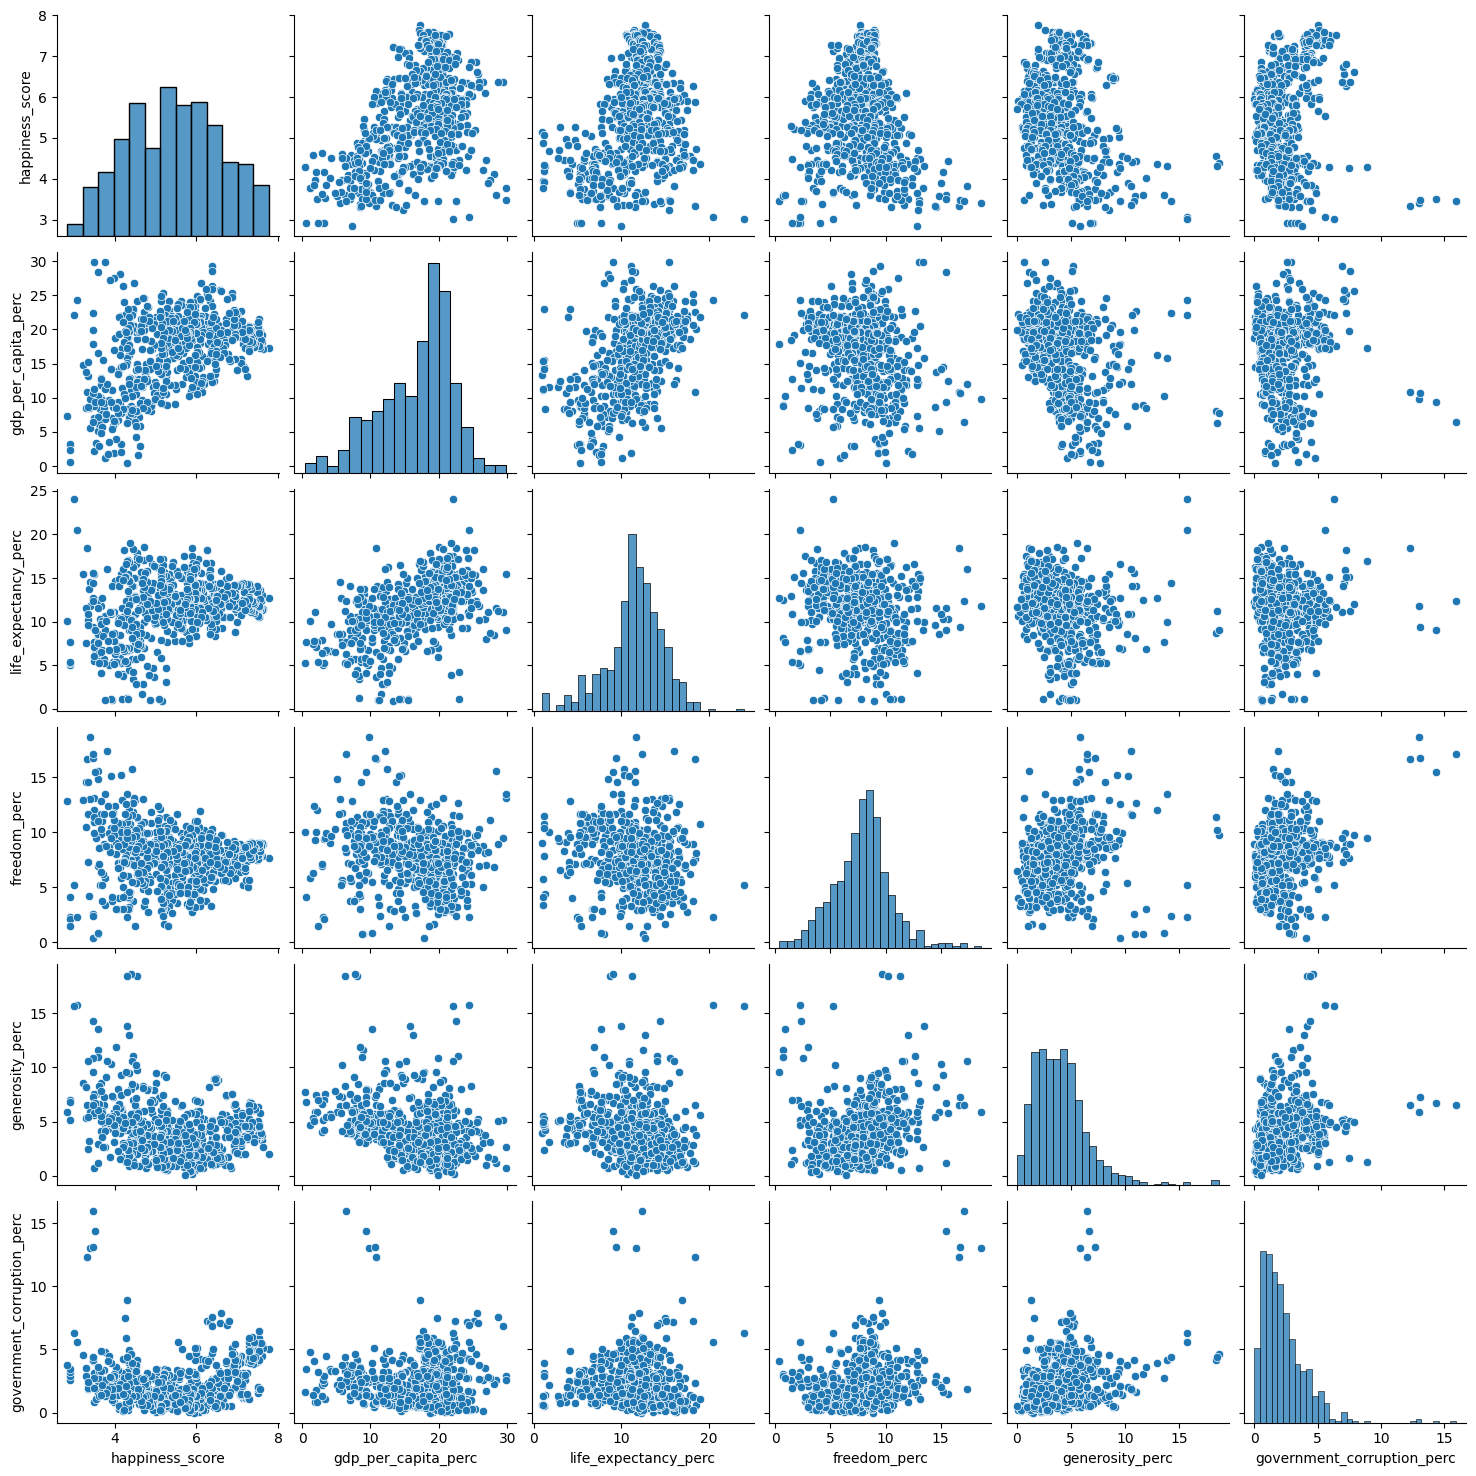

In [71]:
sns.pairplot(df_percent[['happiness_score', 'gdp_per_capita_perc', 'life_expectancy_perc', 'freedom_perc', 'generosity_perc', 'government_corruption_perc']])

Интересно, что есть точка, в которую стремятся, как один график зависимости между метрикой и уровнем счастья, так и другие, а именно:<br>
- Между 10-15% процентами влияния ВВП на душу населения
- Между 10-15 процентами влияния ожидаемой продолжительности жизни
- Около 5% влияния коррупции государства
- 8-10% влияния свободы
- 2-7% щедрости

Все остальное тоже можно сидеть перебирать, но это самое любопытное

Исследуем 10 случайных стран

In [51]:
# При каждом использовании данной ячейки список обновится
research_frame = df.loc[df['country'].isin(list(df.sample(n=10)['country'].unique()))]
research_frame_perc = df_percent.loc[df_percent['country'].isin(list(df_percent.sample(n=10)['country'].unique()))]
#Выводит итоговое количество уникальных стран в выборке
print(research_frame.groupby('country')['year'].max().count())
print(research_frame_perc.groupby('country')['year'].max().count())

10
10


In [52]:
research_frame.head()

country  happiness_rank  happiness_score  gdp_per_capita  \
0       Finland               1            7.769           1.340   
23       France              24            6.592           1.324   
34  El Salvador              35            6.253           0.794   
42     Colombia              43            6.125           0.985   
62     Paraguay              63            5.743           0.855   

    life_expectancy  freedom  generosity  government_corruption  year  
0             0.986    0.596       0.153                  0.393  2019  
23            1.045    0.436       0.111                  0.183  2019  
34            0.789    0.430       0.093                  0.074  2019  
42            0.841    0.470       0.099                  0.034  2019  
62            0.777    0.514       0.184                  0.080  2019

In [53]:
research_frame_perc.head()

country  happiness_rank  happiness_score  gdp_per_capita_perc  \
28      Qatar              29            6.374            26.419831   
29      Spain              30            6.354            20.239219   
41  Lithuania              42            6.149            20.133355   
52     Latvia              53            5.940            19.983165   
93    Vietnam              94            5.175            14.318841   

    life_expectancy_perc  freedom_perc  generosity_perc  \
28             13.664889      8.707248         3.451522   
29             16.713881      5.697199         2.407932   
41             13.302976      4.732477         0.699301   
52             13.670034      4.444444         1.262626   
93             16.444444     10.492754         2.840580   

    government_corruption_perc  year  
28                    2.620019  2019  
29                    1.243311  2019  
41                    0.683038  2019  
52                    1.077441  2019  
93                    1.410628  2019

In [54]:
pivot = research_frame.pivot_table(values = 'happiness_score',index='year',columns='country', sort='year')
pivot.head()


country  Belarus  Cambodia  Colombia  El Salvador  Finland  France  India  \
year                                                                        
2015       5.813     3.819     6.477        6.130    7.406   6.575  4.565   
2016       5.802     3.907     6.481        6.068    7.413   6.478  4.404   
2017       5.569     4.168     6.357        6.003    7.469   6.442  4.315   
2018       5.483     4.433     6.260        6.167    7.632   6.489  4.190   
2019       5.323     4.700     6.125        6.253    7.769   6.592  4.015   

country  Mongolia  Paraguay   Togo  
year                                
2015        4.874     5.878  2.839  
2016        4.907     5.538  3.303  
2017        4.955     5.493  3.495  
2018        5.125     5.681  3.999  
2019        5.285     5.743  4.085

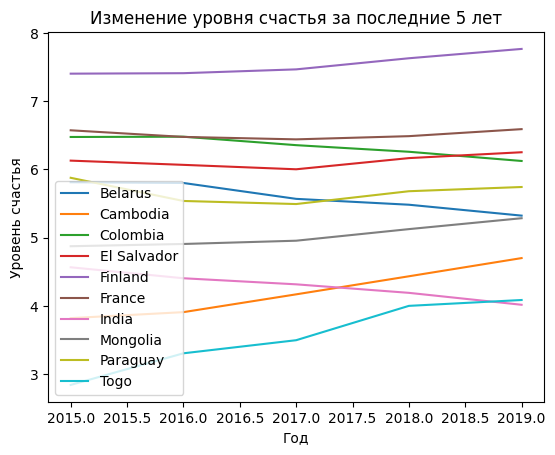

In [55]:
for year in pivot.columns:
    plt.plot(pivot.index, pivot[year])
plt.title('Изменение уровня счастья за последние 5 лет')
plt.xlabel('Год')
plt.ylabel('Уровень счастья') 
plt.legend(pivot)

Тут можно построить гипотезу, что при достижении определенного уровня счастья уровень изменяется очень неохотно, в то время, как при низком уровне колебания происходят очень сильные. Притом общий тренд направлен на рост уровня счастья

Text(0.5, 1.0, 'Влияние тех или иных показателей на уровень счастья в стране')

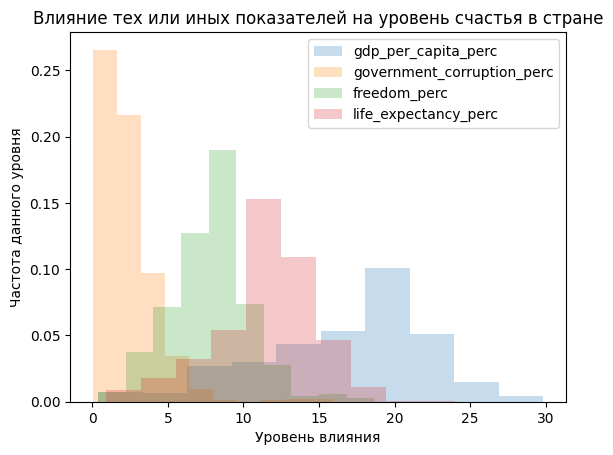

In [56]:
df_percent['gdp_per_capita_perc'].plot(kind='hist', 
                     alpha = 0.25,
                     bins=10,
                     density = True)
df_percent['government_corruption_perc'].plot(kind='hist', 
                     alpha = 0.25,
                     bins=10,
                     density = True)
df_percent['freedom_perc'].plot(kind='hist', 
                     alpha = 0.25,
                     bins=10,
                     density = True)
df_percent['life_expectancy_perc'].plot(kind='hist', 
                     alpha = 0.25,
                     bins=10,
                     density = True)
plt.legend(loc='upper right')
plt.xlabel('Уровень влияния')
plt.ylabel('Частота данного уровня') 
plt.title('Влияние тех или иных показателей на уровень счастья в стране')

Стоит заметить, что все показатели встречаются в сумме одинаковое количество раз, в связи с этим можно сделать вывод, что в счастье населения меньше всего вносит значение уровень коррупции, а больше всего доход на душу населения

In [62]:
pivot = research_frame_perc.pivot_table(values ='gdp_per_capita_perc',index='country',columns='year', sort=True)
pivot.head()

year             2015       2016       2017       2018       2019
country                                                          
Botswana    22.935134  27.535481  29.795384  28.328691  29.845183
Latvia      21.834445  21.904317  21.551259  19.349402  19.983165
Lithuania   19.667924  21.833821  22.273507  20.110887  20.133355
Madagascar   5.657158   7.565359   8.392115   6.942236   6.966692
Nepal        7.974524   9.310661   9.669895   8.709016   9.077956

<AxesSubplot: xlabel='year', ylabel='country'>

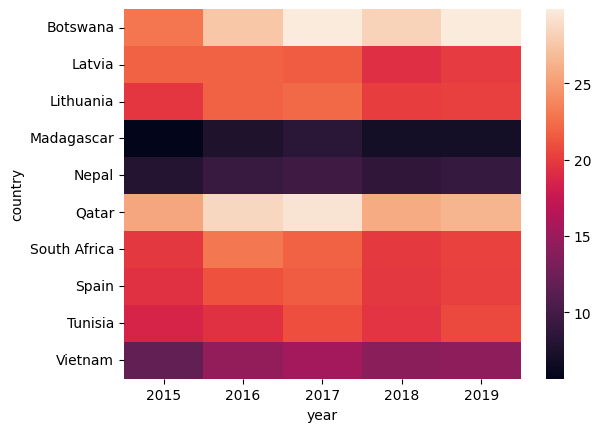

In [63]:
# Данный пока забросил, поскольку разобраться в том как в Seaborn поставить название и.т.д.
# это отдельная запара. До дополнительного не дотяну, но 4 хороших из 6 точно будет
sns.heatmap(
    data=pivot,
)

Здесь можно построить предположение, что влияние на счастье от ВВП на душу населения в ботсване растет, в то время как в остпльных странах остается на высоком месте. Исключениями являются въетнам, мадагаскар и непал, у которых данный показатель хоть и растет, но много медленнее

In [78]:
pivot = df_percent.pivot_table(values ='life_expectancy_perc',index='country',columns='year', sort=True)

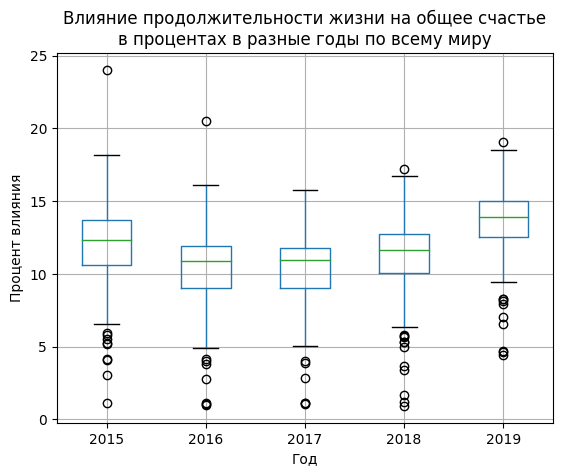

In [81]:
pivot.boxplot()
plt.title('Влияние продолжительности жизни на общее счастье\nв процентах в разные годы по всему миру')
plt.xlabel('Год')
plt.ylabel('Процент влияния') 
plt.show()

Здесь мы можем заметить, что медианное значение влияния падало в 2016 и 2017, а впоследствии вновь поднималось. Изучив данный вопрос мы сможем понять природу этого явления <br>
И все же, в среднем диапазон держится между 10-15%. Присутствуют выбросы в нижнем диапазоне, но много интереснее выбросы в верхнем, которые в целом следует исследовать. Данные выбросы притом навряд ли являются ошибкой, но это можно подтвердить лишь фактическим исследованием.

In [105]:
df_drop = df_percent.drop(labels=['country','happiness_rank','happiness_score'], axis=1).groupby('year').mean()
df_drop

gdp_per_capita_perc  life_expectancy_perc  freedom_perc  \
year                                                            
2015            15.452698             11.959158      8.219674   
2016            17.387909             10.373714      7.049761   
2017            18.088634             10.362279      7.814839   
2018            16.229709             11.175861      8.673625   
2019            16.550127             13.617898      7.357362   

      generosity_perc  government_corruption_perc  
year                                               
2015         4.479009                    2.617255  
2016         4.582570                    2.522109  
2017         4.670281                    2.285014  
2018         3.417978                    2.086307  
2019         3.410037                    2.034395

<AxesSubplot: title={'center': 'Средний мировой процент влияния показателей\nна счастье населения'}, xlabel='Год', ylabel='Влияние'>

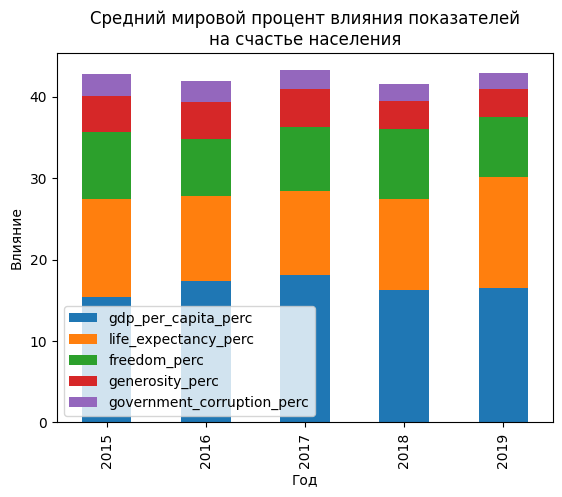

In [111]:
df_drop.plot(kind='bar',
    title='Средний мировой процент влияния показателей\nна счастье населения',
    xlabel='Год', 
    stacked=True,
    ylabel='Влияние')

Тут мы можем заметить, что во первых у нас нет половины показателей. К сожалению с 2018 года часть отрезали в связи с этим их нет, был вынужден убрать колонки из более ранних годов.
Также можно заметить, что большую часть составляет ВВП на душу населения и продолжительность жизни, притом среднее общее влияние данных показателей весьма близко к единой цифре